In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys, os 
sys.path.append("../../")
import numpy as np

from data_loading import load_runs

In [6]:
from microfit.histogram import Binning, MultiChannelBinning

numu_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "Neutrino reconstructed energy (GeV)")
# numu_binning = Binning.from_config("muon_theta", 14, (-1.0, 1.0), "muon $\\cos(\\theta)$")
numu_binning_np = numu_binning.copy()
numu_binning_np.label = "NUMUCRTNP0PI"
numu_binning_np.set_selection(preselection="NUMUCRT", selection="NUMUCRTNP0PI")

numu_binning_zpi = numu_binning.copy()
numu_binning_zpi.label = "NUMUCRT0P0PI"
numu_binning_zpi.set_selection(preselection="NUMUCRT", selection="NUMUCRT0P0PI")

sideband_binning = MultiChannelBinning([numu_binning_np, numu_binning_zpi])

In [7]:
RUNs = ["3_crt"]

rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUNs,
    data="bnb",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=False,
    loadrecoveryvars=False,
    loadsystematics=True,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False, 
    enable_cache=True,
)

Loading run 3_crt


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/overlay_pelee_ntuples_bnb_nu_detvar_run3_CV_reprocess_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_CV_reco2_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/overlay_pelee_ntuples_bnb_nu_detvar_run3_LYDown_reprocess_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/prodgenie_bnb_intrinsic_nue_overlay_DetVar_LYDown_v08_00_00_37_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_LYDown_v08_00_00_37_run3b_reco2_rec

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/overlay_pelee_ntuples_bnb_nu_detvar_run3_WireModYZ_reprocess_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/prodgenie_bnb_nue_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/overlay_pelee_ntuples_bnb_nu_detvar_run3_WireModThetaXZ_reprocess_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run3/detvar/numupresel/prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModA

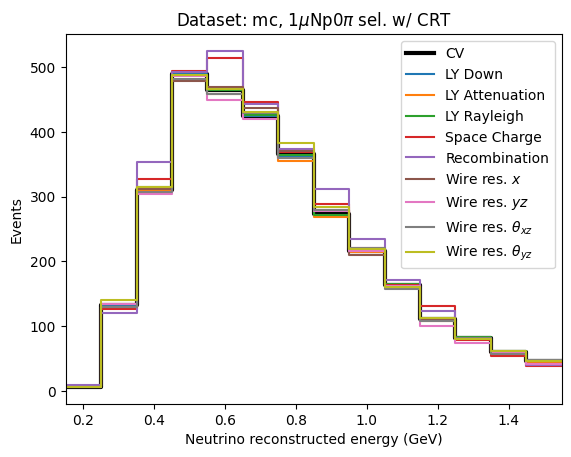

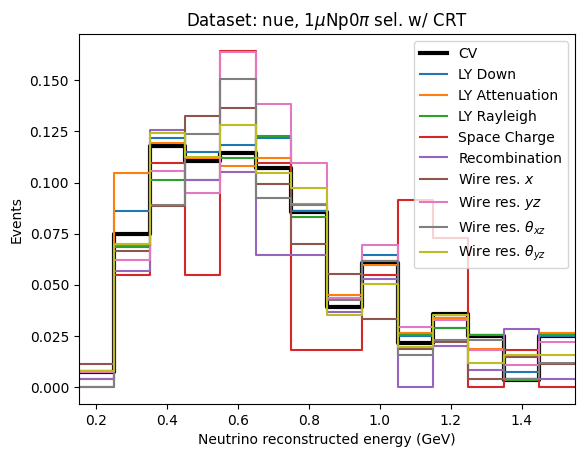

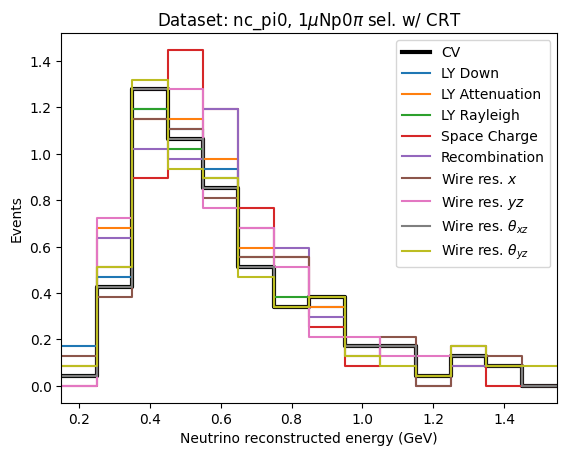

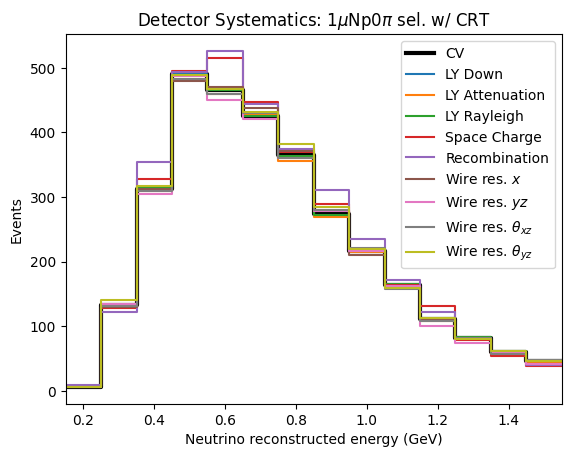

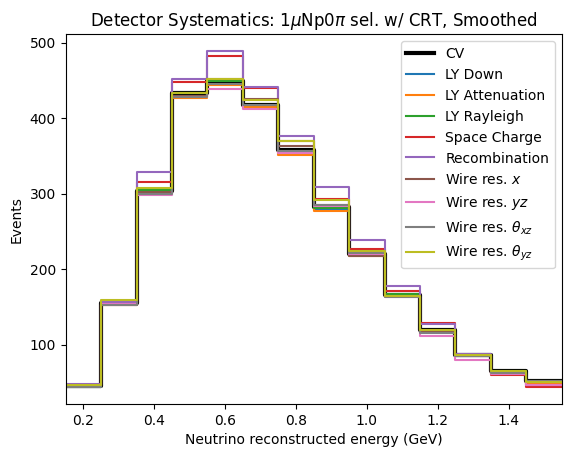

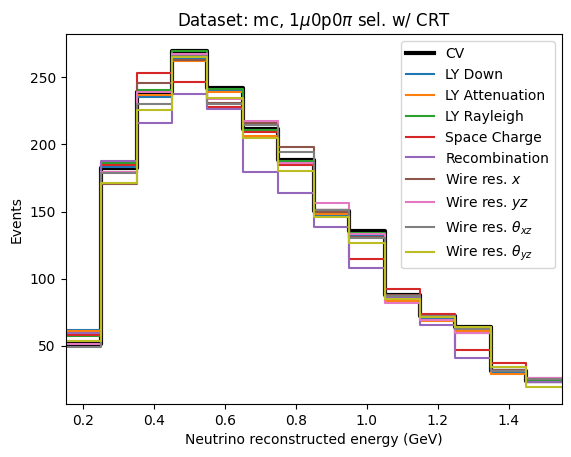

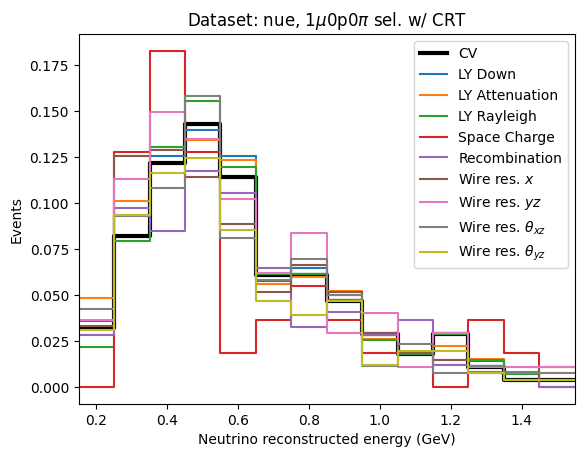

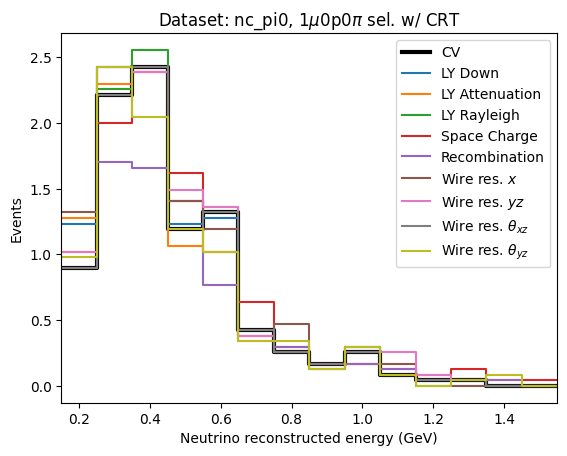

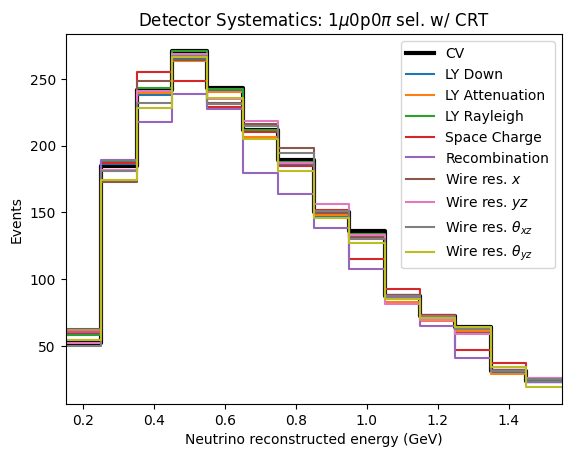

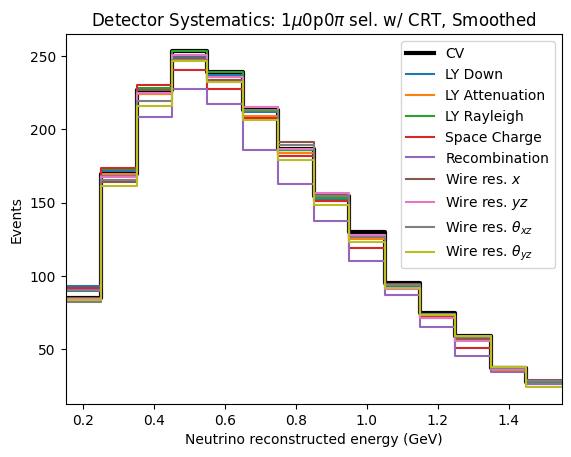

In [8]:
from microfit.detsys import make_variations

numu_sideband_detvars = make_variations(
    RUNs,
    "bnb",
    binning=sideband_binning,
    make_plots=True,
    enable_detvar_cache=True,
    # Truth filter is the only difference w.r.t. the standard data (see config file)
    truth_filtered_sets=["nue","nc_pi0"],
    loadshowervariables=False,
    loadrecoveryvars=False,
    loadsystematics=True,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False, 
    enable_cache=True,
    detvar_cache_dir="split_run_plots_output/testing/cache",
    plot_output_dir="split_run_plots_output/testing/plots",
)

In [9]:
from microfit.histogram import RunHistGenerator
from microfit.run_plotter import RunHistPlotter

numu_sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    uncertainty_defaults=None,
    detvar_data=numu_sideband_detvars
)

../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


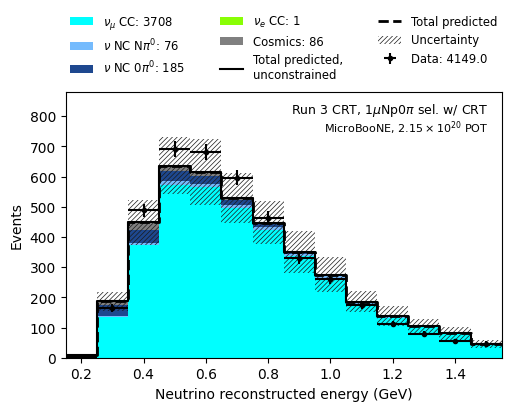

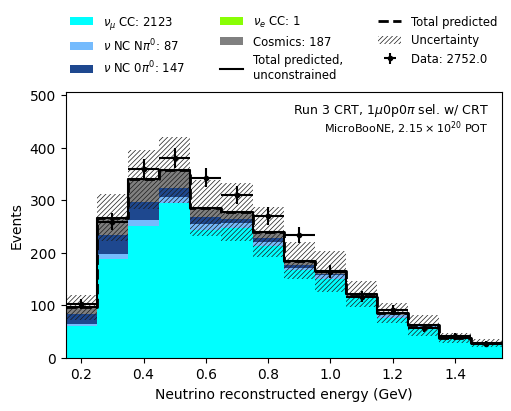

In [10]:
import matplotlib.pyplot as plt

for channel in numu_sideband_generator.channels:
    RunHistPlotter(numu_sideband_generator).plot(
        category_column="paper_category_numu",
        include_multisim_errors=True,
        add_precomputed_detsys=True,
        run_title="Run 3 CRT",
        mb_preliminary=False,
        channel=channel,
        figsize=(5, 4)
    )
    # plt.savefig(f"split_run_plots_output/numu_sideband_{channel}_run3_crt.pdf")

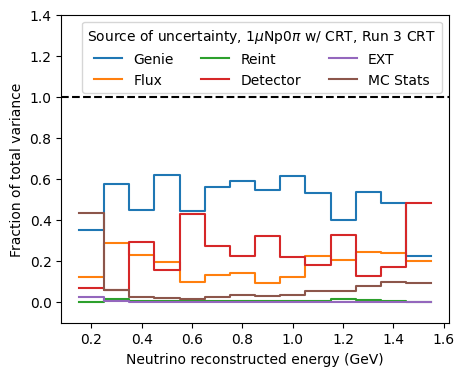

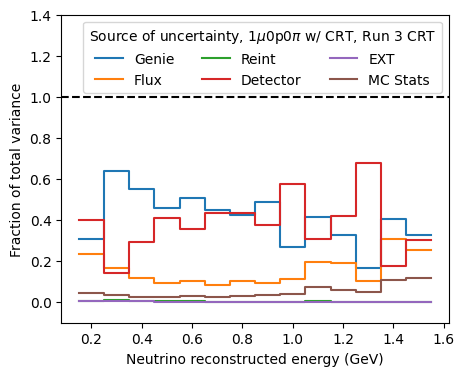

In [11]:
from microfit.statistics import get_cnp_covariance

bare_mc_hist = numu_sideband_generator.mc_hist_generator.generate()
mc_stat_covar = bare_mc_hist.covariance_matrix
detector_covar = numu_sideband_generator.mc_hist_generator.calculate_detector_covariance()
multisim_genie_covar = numu_sideband_generator.mc_hist_generator.calculate_multisim_uncertainties(multisim_weight_column="weightsGenie")
multisim_flux_covar = numu_sideband_generator.mc_hist_generator.calculate_multisim_uncertainties(multisim_weight_column="weightsFlux")
multisim_reint_covar = numu_sideband_generator.mc_hist_generator.calculate_multisim_uncertainties(multisim_weight_column="weightsReint")
unisim_genie_covar = numu_sideband_generator.mc_hist_generator.calculate_unisim_uncertainties()

hist_with_genie_covar = bare_mc_hist.copy()
hist_with_genie_covar.covariance_matrix = multisim_genie_covar + unisim_genie_covar

hist_with_flux_covar = bare_mc_hist.copy()
hist_with_flux_covar.covariance_matrix = multisim_flux_covar

hist_with_reint_covar = bare_mc_hist.copy()
hist_with_reint_covar.covariance_matrix = multisim_reint_covar

hist_with_detector_covar = bare_mc_hist.copy()
hist_with_detector_covar.covariance_matrix = detector_covar

ext_hist = numu_sideband_generator.get_data_hist(type="ext")
data_hist = numu_sideband_generator.get_data_hist(type="data")
assert data_hist is not None
total_prediction = numu_sideband_generator.get_total_prediction(
    include_multisim_errors=True,
    add_precomputed_detsys=True,
)

cnp_covariance = get_cnp_covariance(
    total_prediction.bin_counts,
    data_hist.bin_counts,
)
hist_with_cnp_covar = bare_mc_hist.copy()
hist_with_cnp_covar.covariance_matrix = cnp_covariance

# For each channel, we want to plot the contribution of each source of uncertainty to the
# total variance. Note that we are plotting the variance, rather than the error, because
# only the variance is additive.
for channel in total_prediction.channels:
    
    fig, ax = plt.subplots(figsize=(5, 4))
    # the total is always at one
    ax.axhline(1, color="black", linestyle="--")
    total_variance = total_prediction[channel].std_devs**2
    genie_variance = hist_with_genie_covar[channel].std_devs**2
    flux_variance = hist_with_flux_covar[channel].std_devs**2
    reint_variance = hist_with_reint_covar[channel].std_devs**2
    detector_variance = hist_with_detector_covar[channel].std_devs**2
    ext_variance = ext_hist[channel].std_devs**2
    mc_stats_variance = bare_mc_hist[channel].std_devs**2

    bin_edges = total_prediction[channel].binning.bin_edges

    def repeat_last(array):
        return np.concatenate((array, [array[-1]]))
    # Make a step plot for each source of uncertainty
    for variance, name in zip(
        [genie_variance, flux_variance, reint_variance, detector_variance, ext_variance, mc_stats_variance],
        ["Genie", "Flux", "Reint", "Detector", "EXT", "MC Stats"]
    ):
        ax.step(
            bin_edges,
            repeat_last(variance / total_variance),
            where="post",
            label=name
        )
    # just as a check, the sum of the contributions should be 1 (comment out because this is only for debugging)
    # ax.step(
    #     bin_edges,
    #     repeat_last((genie_variance + flux_variance + reint_variance + detector_variance + ext_variance + mc_stats_variance) / total_variance),
    #     where="post",
    #     label="Sum"
    # )
    ax.legend(ncol=3, title=f"Source of uncertainty, {total_prediction[channel].binning.selection_tex_short}, Run 3 CRT")
    ax.set_xlabel(total_prediction[channel].binning.variable_tex)
    ax.set_ylabel("Fraction of total variance")
    ax.set_ylim((-0.1, 1.4))


Loading run 3_crt


Making plots for mc
Making plots for nue
Making plots for nc_pi0
Making plots for mc
Making plots for nue
Making plots for nc_pi0


../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


Loading run 4b
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4b/numupresel/run4b_bnb_beamon_crtremerging_pandora_reco2_run4b_ana.root


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4b/numupresel/fix_bnb_beam_off_pandora_reco2_crt_remerging_run4b_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4b/numupresel/run4b_bnb_nu_overlay_unified_pandora_reco2_run4b_ana.root


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsFlux', 'weightsReint', 'weightsGenie', 'run_number'], dtype='object')]

  encoding=encoding,


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4b/numupresel/run4b_bnb_nue_overlay_crtremerging_pandora_reco2_run4b_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4b/numupresel/Run4b_BNB_dirt_overlay_Pandora_Reco2_reco2_ana.root
Loading run 4c
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4c/numupresel/run4c_bnb_beamon_crtremerging_pandora_reco2_run4c_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4c/numupresel/run4c_bnb_beam_off_crtremerging_pandora_reco2_run4c_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4c/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run4c_nu.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4c/numupresel/run4c_bnb_nue_overlay_crtremerging_pandora_reco2_respin2_run4c_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4c/numupresel/overlay_peleeTuple_ubo

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4d/numupresel/Run4d_BNB_dirt_overlay_Pandora_Unified_Reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/Detvar_BNB_nu_pandora_reco2_CV_run4_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/run4_bnb_intrinsic_nue_detvar_cv_pandora_unified_reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_CV_reco2_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/run4_5_bnb_nu_overlay_detvar_LYDown_reco2_pandora_unified_run4_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/Run_4_BNB_Nue_Detvar_LY_Down_Pandora_Reco2_Run4_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Sample

../../microfit/detsys.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Making plots for nc_pi0


../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


Loading run 5
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5/numupresel/run5_bnb_beamon_PeLEE_ntuples_run5_ana.root


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5/numupresel/Run5_bnb_beamOff_PeLee_ntuples_run5_ana_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5/numupresel/run5_bnb_nu_overlay_ntuple_v08_00_00_67_run5_ana.root


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsFlux', 'weightsReint', 'weightsGenie', 'run_number'], dtype='object')]

  encoding=encoding,


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5/numupresel/run5_bnb_intrinsic_nue_overlay_pandora_unified_reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run5_dirt.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/run5_DetVar_bnb_CV_Pandora_Unified_reco2_run5_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/run5_bnb_intrinsic_nue_detvar_cv_pandora_unified_reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_CV_reco2_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/run4_5_bnb_nu_overlay_detvar_LYDown_reco2_pandora_unified_run5_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Sampl

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/Run5_BNB_Nue_Detvar_WireModYZ_Pandora_Reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/run5_bnb_nu_detvar_Pandora_WireMod_Theta_XZ_reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/Run_5_BNB_Nue_Pandora_DetVar_WireMod_ThetaXZ_fix_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_WireModAngleXZ_v08_00_00_38_run3b_reco2_reco2_ntuples.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/run5_bnb_nu_detvar_Pandora_WireMod_Theta_YZ_reco2_reco2_ana.root
Loading data from: /

../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


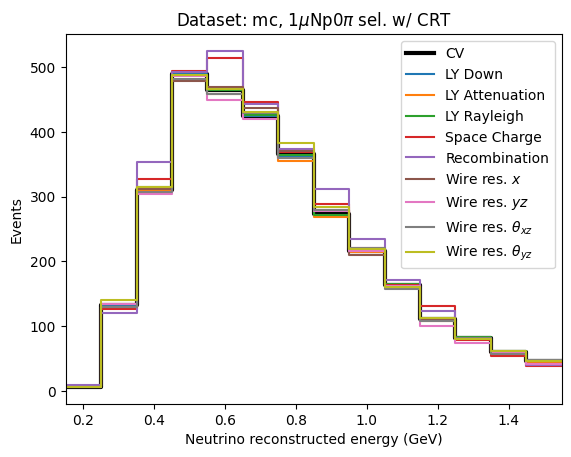

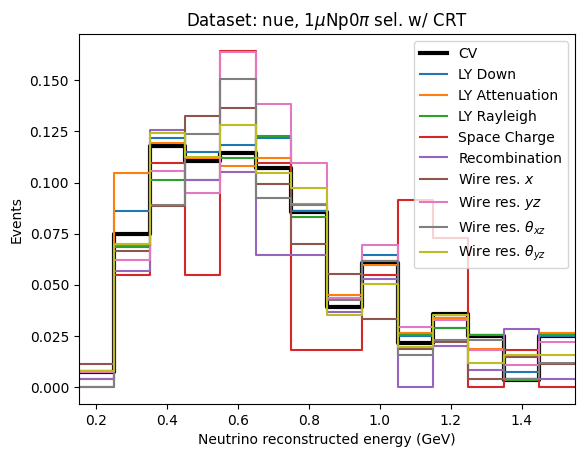

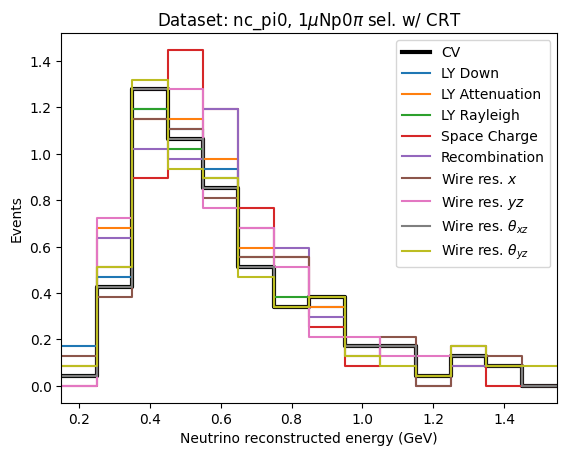

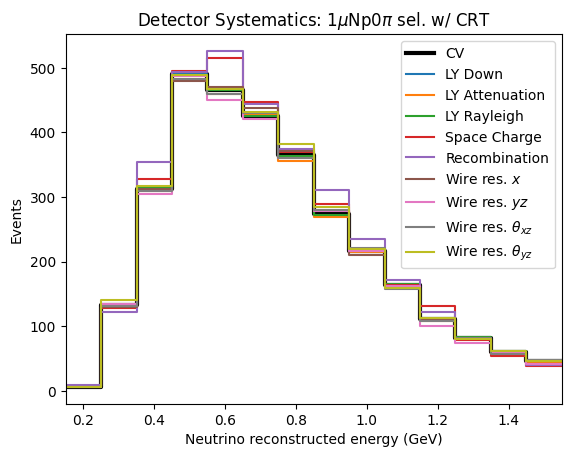

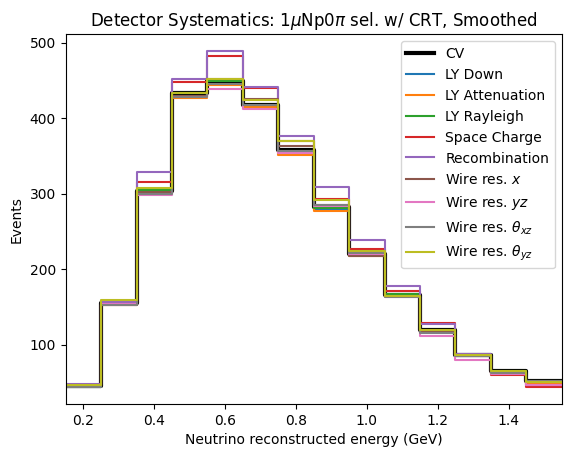

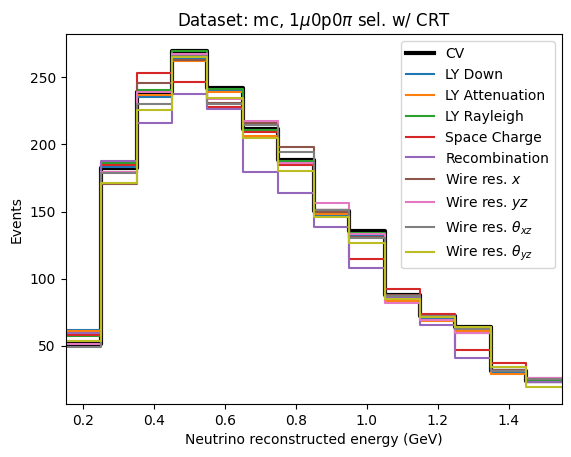

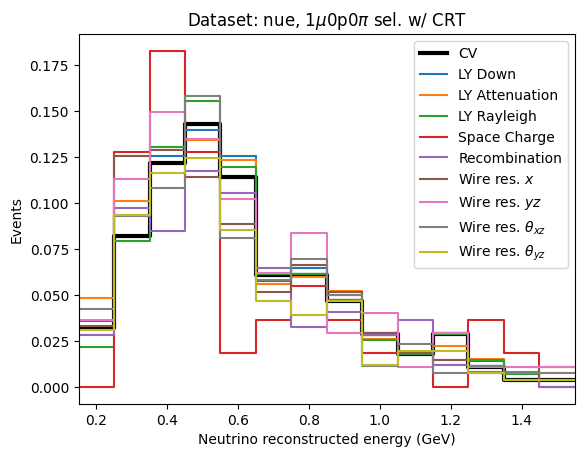

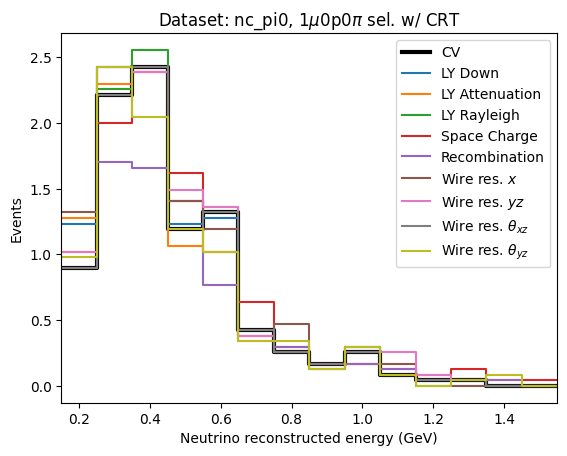

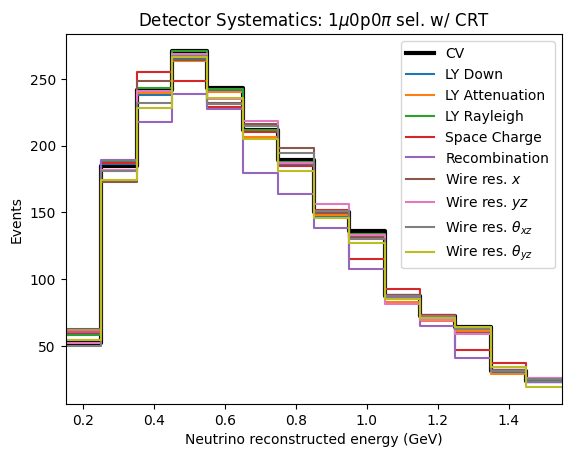

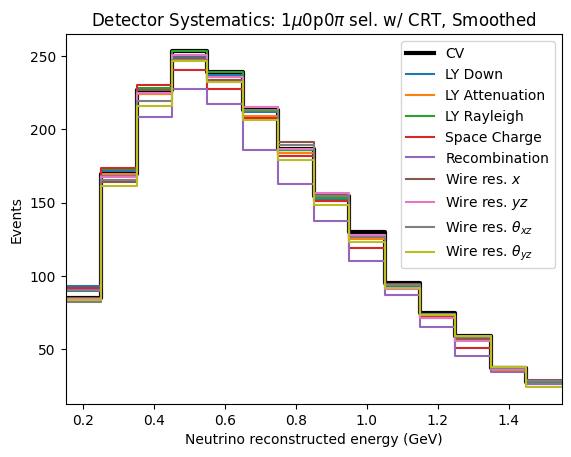

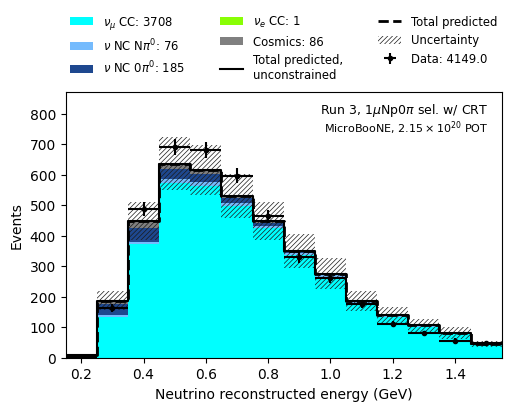

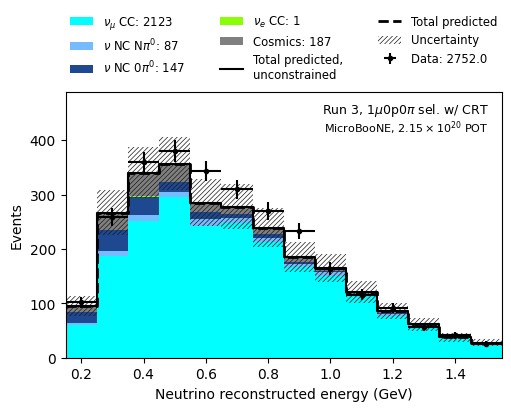

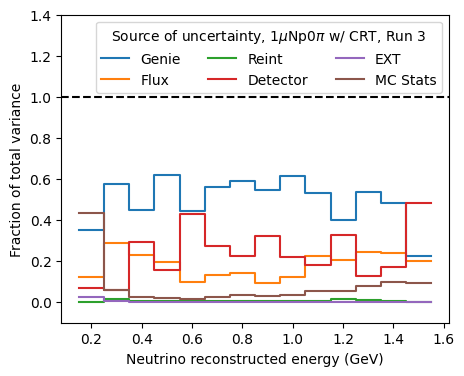

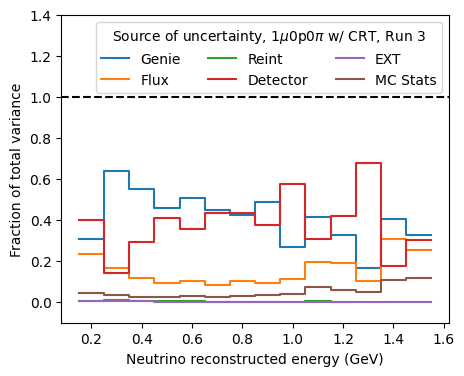

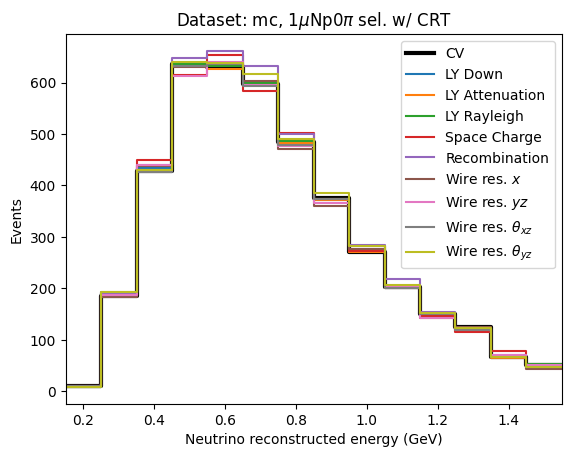

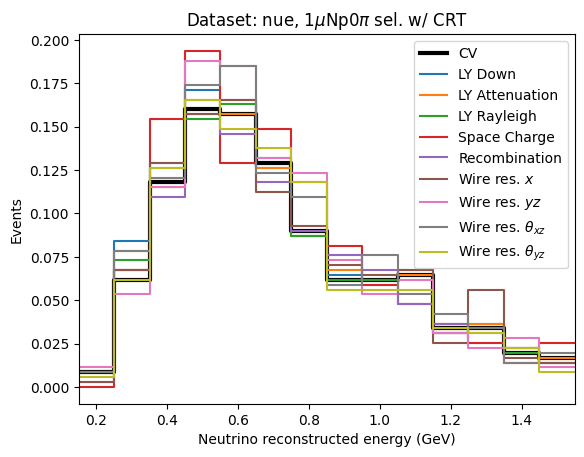

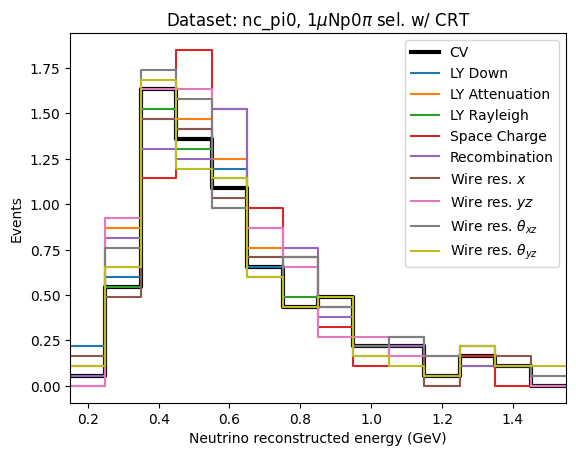

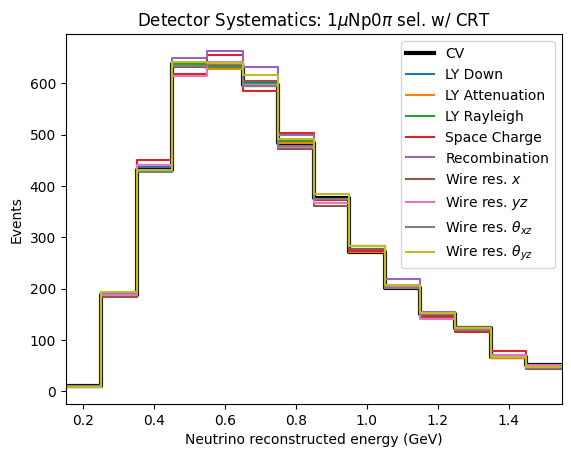

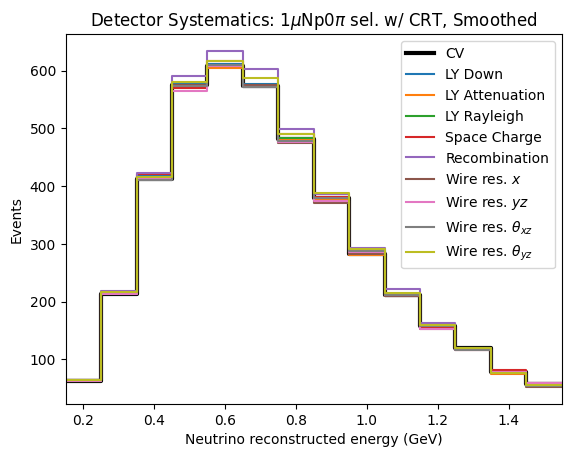

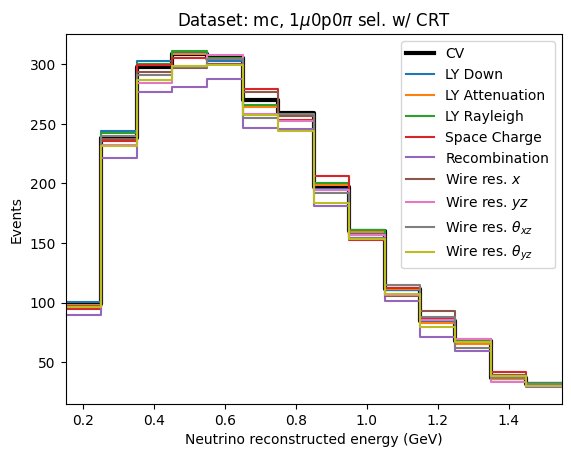

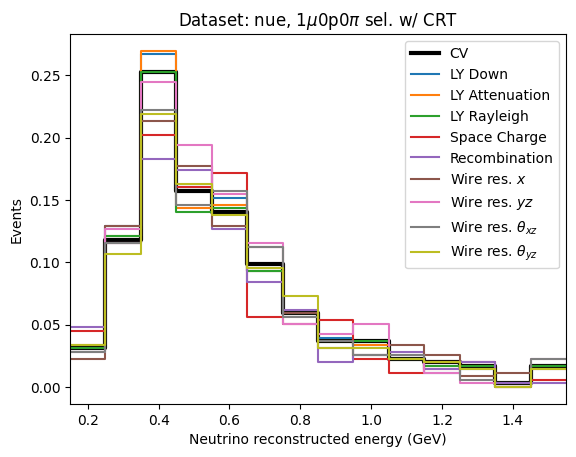

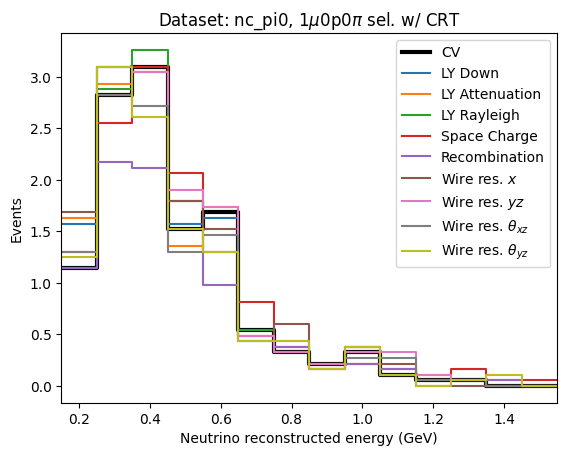

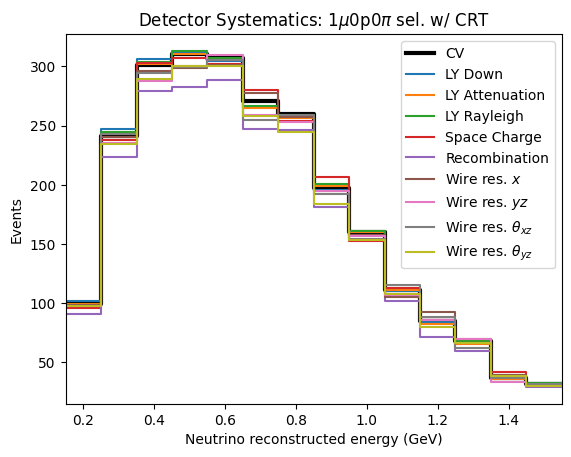

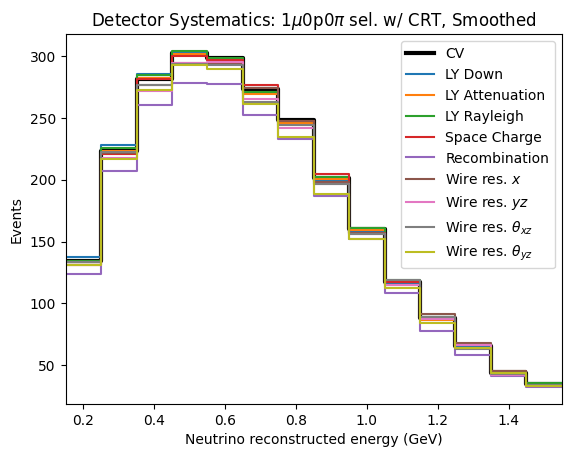

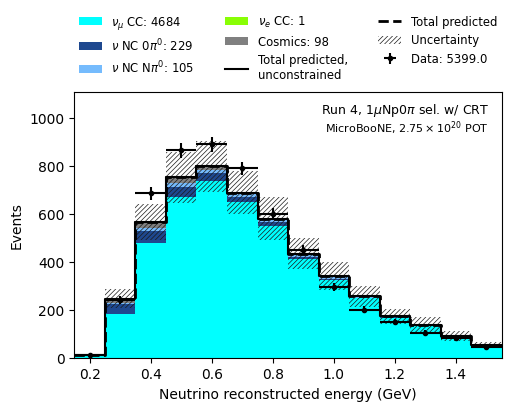

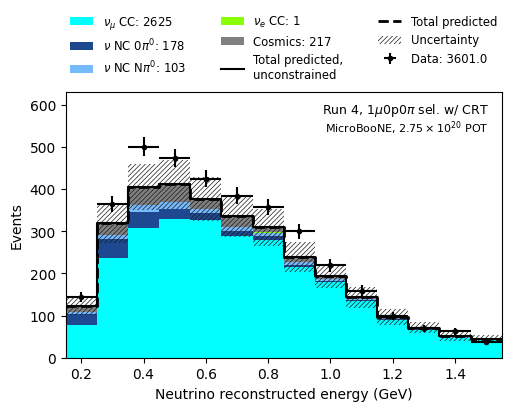

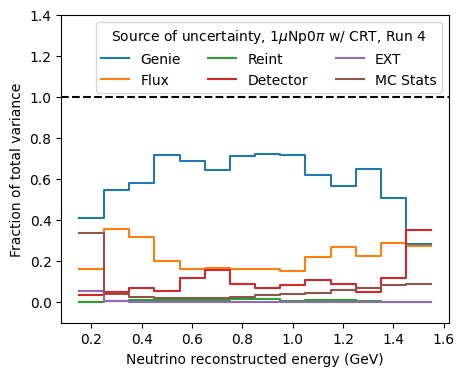

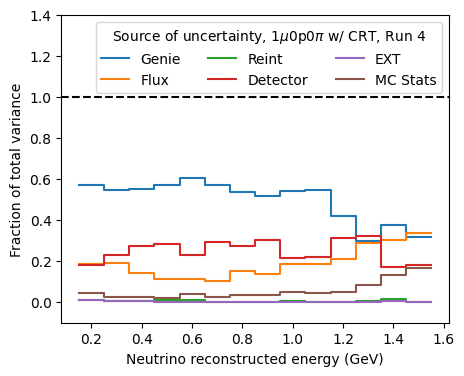

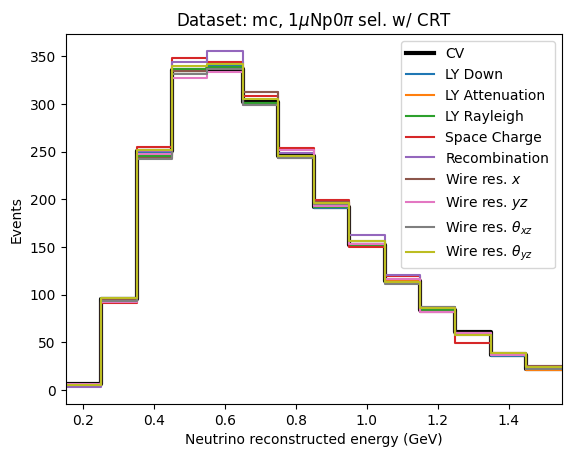

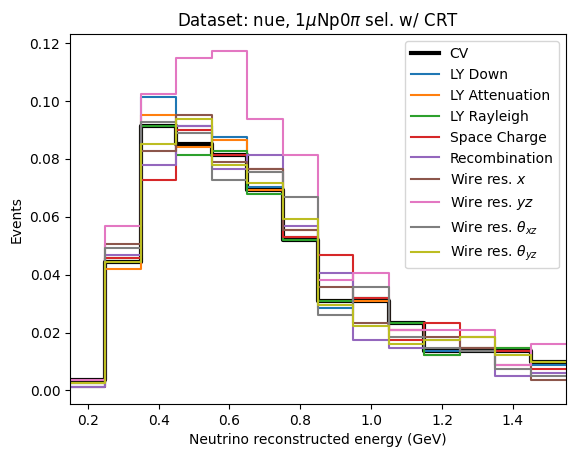

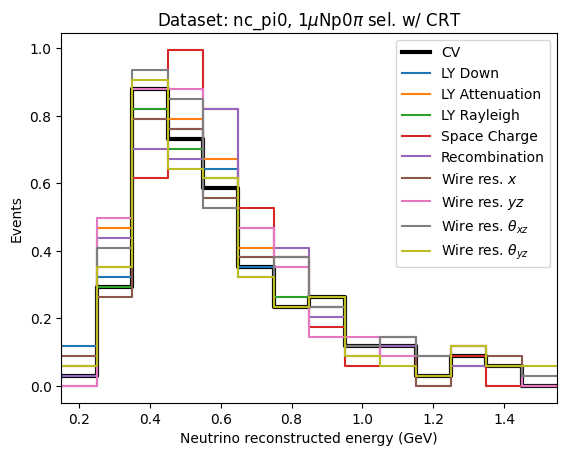

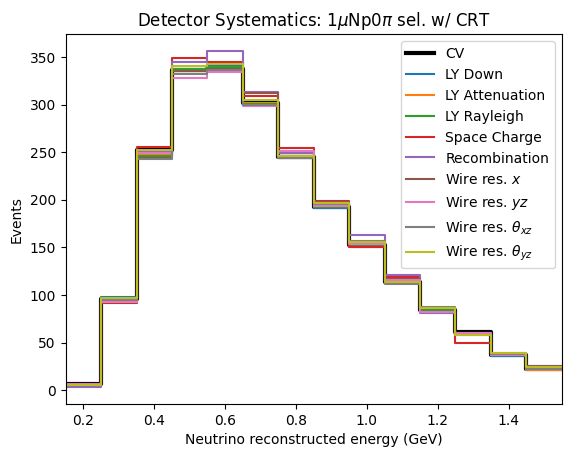

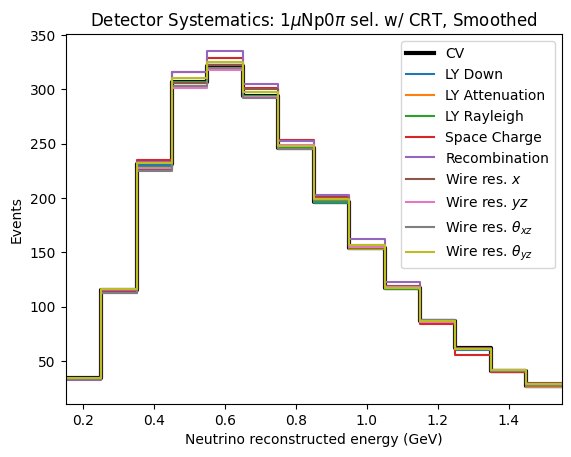

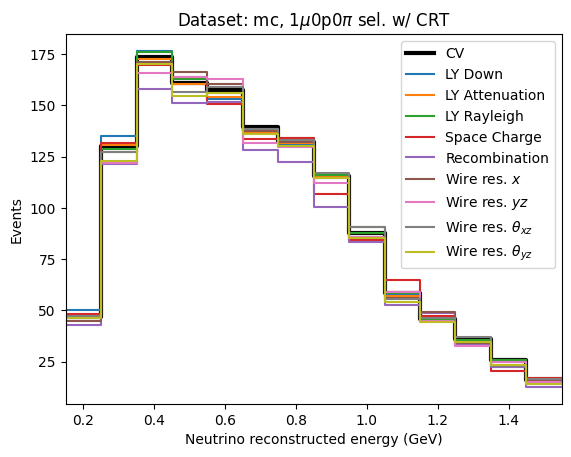

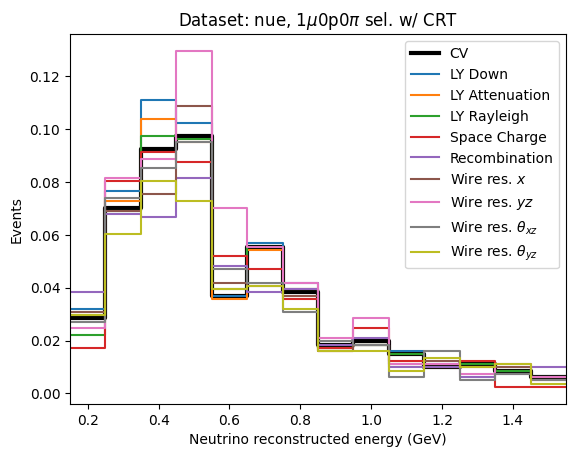

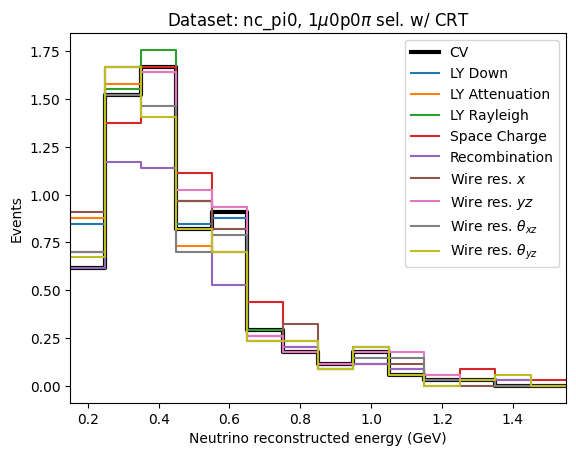

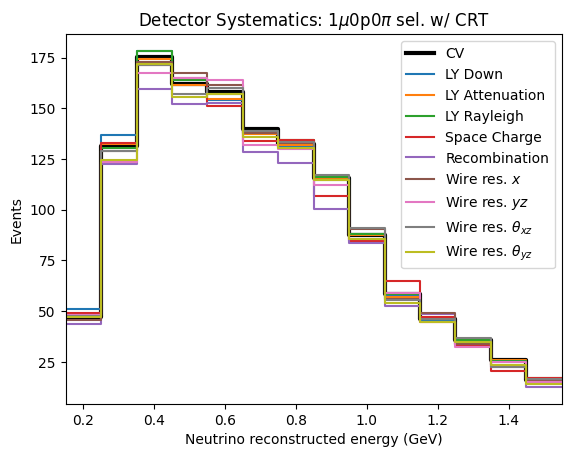

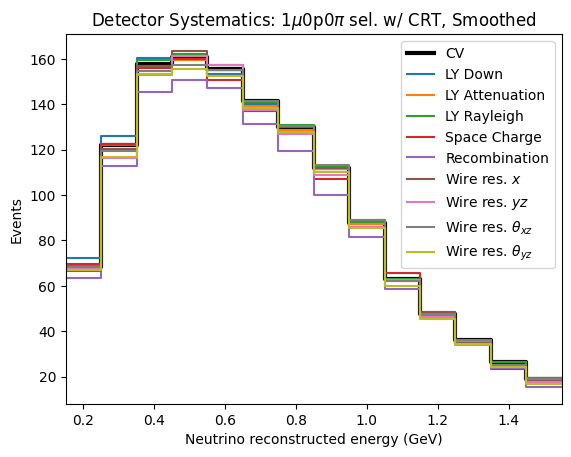

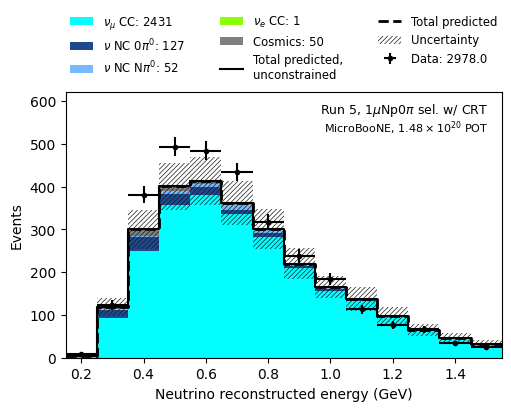

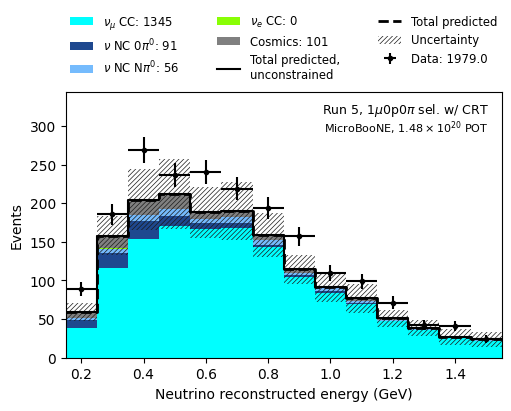

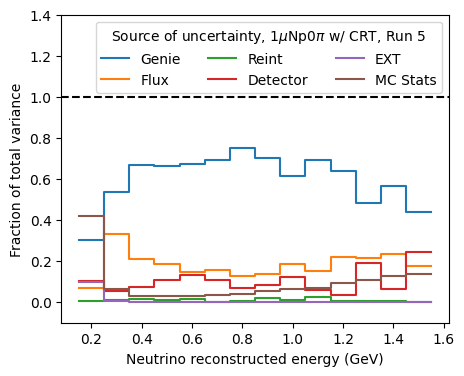

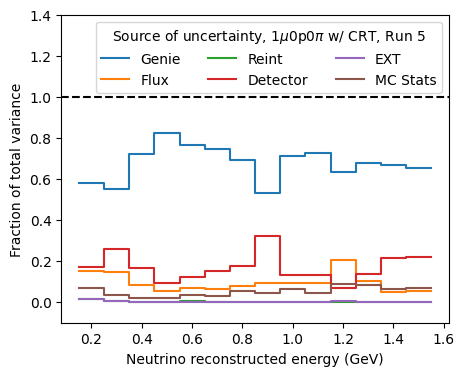

In [12]:
import matplotlib.pyplot as plt

from microfit.histogram import RunHistGenerator
from microfit.run_plotter import RunHistPlotter
from microfit.detsys import make_variations
# now we loop over all runs to make these plots for each

for RUN, run_name in zip([["3_crt"], ["4b", "4c", "4d"], ["5"]], ["3", "4", "5"]):
    rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
        RUN,
        data="bnb",
        truth_filtered_sets=["nue", "drt"],
        loadshowervariables=False,
        loadrecoveryvars=False,
        loadsystematics=True,
        use_bdt=False,
        numupresel=True,
        loadnumuvariables=True,
        load_crt_vars=True,
        blinded=False, 
        enable_cache=True,
    )

    # if they don't exist yet, make the plot and cache directories
    os.makedirs(f"split_run_plots_output/numu_sideband_detvars/cache_run{''.join(RUN)}", exist_ok=True)
    os.makedirs(f"split_run_plots_output/numu_sideband_detvars/plots_run{''.join(RUN)}", exist_ok=True)
    numu_sideband_detvars = make_variations(
        RUN,
        "bnb",
        binning=sideband_binning,
        make_plots=True,
        enable_detvar_cache=True,
        # Truth filter is the only difference w.r.t. the standard data (see config file)
        truth_filtered_sets=["nue","nc_pi0"],
        loadshowervariables=False,
        loadrecoveryvars=False,
        loadsystematics=True,
        use_bdt=False,
        numupresel=True,
        loadnumuvariables=True,
        load_crt_vars=True,
        blinded=False, 
        enable_cache=True,
        detvar_cache_dir=f"split_run_plots_output/numu_sideband_detvars/cache_run{''.join(RUN)}",
        plot_output_dir=f"split_run_plots_output/numu_sideband_detvars/plots_run{''.join(RUN)}",
    )

    numu_sideband_generator = RunHistGenerator(
        rundata_numu,
        sideband_binning,
        data_pot=data_pot_numu,
        uncertainty_defaults=None,
        detvar_data=numu_sideband_detvars
    )

    for channel in numu_sideband_generator.channels:
        RunHistPlotter(numu_sideband_generator).plot(
            category_column="paper_category_numu",
            include_multisim_errors=True,
            run_title=f"Run {run_name}",
            mb_preliminary=False,
            channel=channel,
            figsize=(5, 4)
        )
        plt.savefig(f"split_run_plots_output/numu_sideband_{channel}_runs{''.join(RUN)}.pdf")
    
    # Also make the plots showing the contribution of each source of uncertainty to the total variance
    bare_mc_hist = numu_sideband_generator.mc_hist_generator.generate()
    mc_stat_covar = bare_mc_hist.covariance_matrix
    detector_covar = numu_sideband_generator.mc_hist_generator.calculate_detector_covariance()
    multisim_genie_covar = numu_sideband_generator.mc_hist_generator.calculate_multisim_uncertainties(multisim_weight_column="weightsGenie")
    multisim_flux_covar = numu_sideband_generator.mc_hist_generator.calculate_multisim_uncertainties(multisim_weight_column="weightsFlux")
    multisim_reint_covar = numu_sideband_generator.mc_hist_generator.calculate_multisim_uncertainties(multisim_weight_column="weightsReint")
    unisim_genie_covar = numu_sideband_generator.mc_hist_generator.calculate_unisim_uncertainties()

    hist_with_genie_covar = bare_mc_hist.copy()
    hist_with_genie_covar.covariance_matrix = multisim_genie_covar + unisim_genie_covar

    hist_with_flux_covar = bare_mc_hist.copy()
    hist_with_flux_covar.covariance_matrix = multisim_flux_covar

    hist_with_reint_covar = bare_mc_hist.copy()
    hist_with_reint_covar.covariance_matrix = multisim_reint_covar

    hist_with_detector_covar = bare_mc_hist.copy()
    hist_with_detector_covar.covariance_matrix = detector_covar

    ext_hist = numu_sideband_generator.get_data_hist(type="ext")
    data_hist = numu_sideband_generator.get_data_hist(type="data")
    assert data_hist is not None
    total_prediction = numu_sideband_generator.get_total_prediction(
        include_multisim_errors=True,
        add_precomputed_detsys=True,
    )

    cnp_covariance = get_cnp_covariance(
        total_prediction.bin_counts,
        data_hist.bin_counts,
    )
    hist_with_cnp_covar = bare_mc_hist.copy()
    hist_with_cnp_covar.covariance_matrix = cnp_covariance

    # For each channel, we want to plot the contribution of each source of uncertainty to the
    # total variance. Note that we are plotting the variance, rather than the error, because
    # only the variance is additive.
    for channel in total_prediction.channels:
        
        fig, ax = plt.subplots(figsize=(5, 4))
        # the total is always at one
        ax.axhline(1, color="black", linestyle="--")
        total_variance = total_prediction[channel].std_devs**2
        genie_variance = hist_with_genie_covar[channel].std_devs**2
        flux_variance = hist_with_flux_covar[channel].std_devs**2
        reint_variance = hist_with_reint_covar[channel].std_devs**2
        detector_variance = hist_with_detector_covar[channel].std_devs**2
        ext_variance = ext_hist[channel].std_devs**2
        mc_stats_variance = bare_mc_hist[channel].std_devs**2

        bin_edges = total_prediction[channel].binning.bin_edges

        def repeat_last(array):
            return np.concatenate((array, [array[-1]]))
        # Make a step plot for each source of uncertainty
        for variance, name in zip(
            [genie_variance, flux_variance, reint_variance, detector_variance, ext_variance, mc_stats_variance],
            ["Genie", "Flux", "Reint", "Detector", "EXT", "MC Stats"]
        ):
            ax.step(
                bin_edges,
                repeat_last(variance / total_variance),
                where="post",
                label=name
            )
        # just as a check, the sum of the contributions should be 1 (comment out because this is only for debugging)
        # ax.step(
        #     bin_edges,
        #     repeat_last((genie_variance + flux_variance + reint_variance + detector_variance + ext_variance + mc_stats_variance) / total_variance),
        #     where="post",
        #     label="Sum"
        # )
        ax.legend(ncol=3, title=f"Source of uncertainty, {total_prediction[channel].binning.selection_tex_short}, Run {run_name}")
        ax.set_xlabel(total_prediction[channel].binning.variable_tex)
        ax.set_ylabel("Fraction of total variance")
        ax.set_ylim((-0.1, 1.4))

        fig.savefig(f"split_run_plots_output/numu_sideband_detvars/uncertainty_contributions_{channel}_run{''.join(RUN)}.pdf")